# Unsupervizing Machine Learning 

## Split all consumers into clusters using a self-organizing map algorithm (SOM)
## let's create a neural network using the library SUSI

https://susi.readthedocs.io/en/latest/index.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import susi
from susi.SOMPlots import plot_nbh_dist_weight_matrix, plot_umatrix

In [2]:
# we have already prepared and normalized dataset of customers
# Customer's features: 'CustomerID', 'Recency', 'Frequency', 'Revenue'
df = pd.read_csv("tx_user_clean.csv").drop('CustomerID', axis=1)
df

,Recency,Frequency,Revenue
0,0.344812,3.219593,1.652553
1,0.633160,-0.478092,-2.046450
2,0.081982,5.068435,3.492416
3,0.633160,-0.478092,0.253329
4,0.633160,-0.478092,-0.094463
...,...,...,...
53910,-5.474123,-0.478092,-0.025527
53911,-5.474123,-0.478092,-0.247946
53912,-5.474123,-0.478092,-1.012654
53913,-5.474123,-0.478092,-0.090935


In [3]:
X = df.values # look on all RFM
X

array([[ 0.34481198,  3.2195927 ,  1.65255276],
       [ 0.63315986, -0.47809154, -2.04645017],
       [ 0.08198161,  5.06843481,  3.49241599],
       ...,
       [-5.47412307, -0.47809154, -1.01265357],
       [-5.47412307, -0.47809154, -0.0909355 ],
       [-5.47412307, -0.47809154, -0.10226445]])

In [4]:
# X_Rec = X[:,0] # look on the Recency
# X_Fr = X[:,1] # look on the Frequency
# X_Rev = X[:,2] # look on the Revenue

In [5]:
# X_Rec = X_Rec.reshape(-1, 1) # this needs for SuSi if we use only one column from dataset  

# 1. Look on the Frequency

In [6]:
X_Fr = X[:,1] # look on the Frequency
X_Fr

array([ 3.2195927 , -0.47809154,  5.06843481, ..., -0.47809154,
       -0.47809154, -0.47809154])

In [7]:
X_Fr = X_Fr.reshape(-1, 1) 
# this needs for SuSi if we use only one column from dataset
X_Fr

array([[ 3.2195927 ],
       [-0.47809154],
       [ 5.06843481],
       ...,
       [-0.47809154],
       [-0.47809154],
       [-0.47809154]])

# Make SOM Clustering and plot

In [8]:
som = susi.SOMClustering(
    n_rows=20,
    n_columns=20,
    n_iter_unsupervised=10000
)
som.fit(X_Fr)
print("SOM fitted!")

SOM fitted!


# Plot u-Matrix

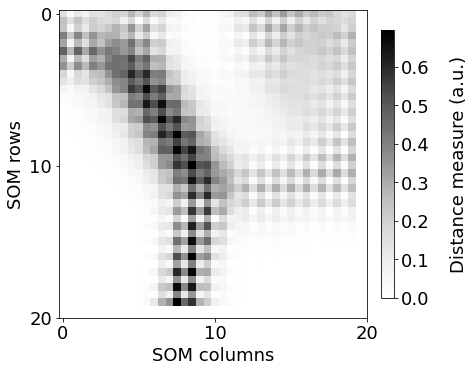

In [9]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 20, 20)
plt.show()

# Plot clusters

In [ ]:
clusters = som.get_clusters(X_Fr)
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters],  alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
clusters

In [ ]:
len(set(tuple([m, n]) for m, n in clusters)) 
# how many unique clustes we received

In [ ]:
coord_clusters = set(tuple([m, n]) for m, n in clusters)
# coordinates of clusters in the SOM grid
coord_clusters

### Let's count how many datapoints are in the each cluster:

In [ ]:
list_clusters = []
for i in coord_clusters:
    list_clusters.append(list(i))
list_clusters

In [ ]:
for c in list_clusters:
    amount = len(som.get_datapoints_from_node(c))
    print(amount, 'datapoints in the csluster ',c)



###  let's make list of remarkered clusters for further use in pandas dataframe:
- '0' cluster 
- '1' cluster 
- '2' cluster 
- '3' cluster 
- '4' cluster
- and so on.

In [ ]:
frequency_clusters = [] 
for cluster in clusters:
    for i in range(len(list_clusters)):
        if (cluster[0] == list_clusters[i][0]) \
        and (cluster[1] == list_clusters[i][1]):
            frequency_clusters.append(i)
len(frequency_clusters)

In [ ]:
df['Freq_clusters'] = frequency_clusters
df

# Plot neighborhood distance matrix

In [ ]:
plot_nbh_dist_weight_matrix(som)
plt.show()

# Make 3D plot based on Frequency SOM Clustering

In [ ]:
y_pred = df['Freq_clusters'].values

In [ ]:
from itertools import cycle, islice

plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(
    ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf',
     '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), 
int(max(y_pred) + 1))))
    # black color for outliers
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

# 0 - blue, 1 - orange, 2 - green, 3 - pink, 4 - brown

In [ ]:
#Make Plotly figure
import plotly
import plotly.graph_objs as go

fig1 = go.Scatter3d(x=df['Recency'],
                    y=df['Frequency'],
                    z=df['Revenue'],
                    marker=dict(opacity=0.9,
                                reversescale=True,
                                colorscale='Blues',
                                color=colors[y_pred],
                                size=2),
                    line=dict (width=0.5),
                    mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Recency"),
                                yaxis=dict( title="Frequency"),
                                zaxis=dict(title="Revenue")),)

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True,
                     filename=("3DPlot_SOM_Frequency_color.html"))

# Conclusion:

as we can see on html file, there six clusters of customers, received from feature 'Frequency'. So, we splitted all customers by frequency of purchases